In [0]:
#Priya Rajpurohit 2015073
#Sakshi Saini 2017092

In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import keras
import keras.backend as K
from keras.models import Model
import cv2 
import numpy as np 
from keras import backend as K 
from keras.utils import np_utils

import math 
from sklearn.model_selection import train_test_split

In [0]:
ds, ds_info = tfds.load("plant_village", split=tfds.Split.TRAIN, batch_size=-1 , with_info=True )

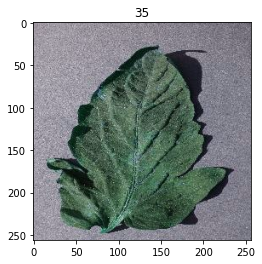

In [0]:
ds = tfds.as_numpy(ds)
images, labels = ds["image"], ds["label"]

image = images[0]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(labels[0])
plt.show()

In [0]:
import matplotlib.pyplot as plt
from google.colab import files

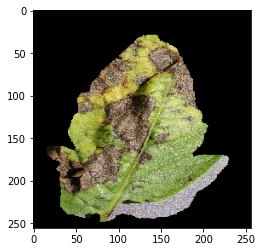

In [0]:
for i in range(20000):
  original = images[i]

  marker = background_marker(original)
  filling_mode = 1
  bin_image = np.zeros((original.shape[0], original.shape[1]))
  bin_image[marker] = 255
  bin_image = bin_image.astype(np.uint8)

  largest_mask = select_largest_obj(bin_image, fill_mode=filling_mode, smooth_boundary=True)

  image = original.copy()
  image[largest_mask == 0] = np.array([0, 0, 0])


In [0]:
def generate_background_marker(original_image):

    marker = np.full((original_image.shape[0], original_image.shape[1]), True)
    color_index_marker(index_diff(original_image), marker)
    return marker

In [0]:
def index_diff(image, green_scale=2.0, red_scale=1.4):

    bgr_sum = np.sum(image, axis=2)

    blues = div0(image[:, :, 0], bgr_sum)
    greens = div0(image[:, :, 1], bgr_sum)
    reds = div0(image[:, :, 2], bgr_sum)

    green_index = green_scale * greens - (reds + blues)
    red_index = red_scale * reds - (greens)

    return green_index - red_index
    

In [0]:
def select_largest_obj(img_bin, lab_val=255, fill_mode=1, kernel_size=15):
  
    n_labels, img_labeled, lab_stats, _ = cv2.connectedComponentsWithStats(img_bin, connectivity=8, ltype=cv2.CV_32S)

    largest_obj_lab = np.argmax(lab_stats[1:, 4]) + 1

    cv2.floodFill(img_floodfill, mask_, seedPoint=bkg_seed,
                newVal=lab_val)
    holes_mask = cv2.bitwise_not(img_floodfill) 

    non_holes_mask = generate_floodfill_mask(largest_mask)
    holes_mask = np.bitwise_and(holes_mask, np.bitwise_not(non_holes_mask))

    largest_mask = largest_mask + holes_mask

    return largest_mask